In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

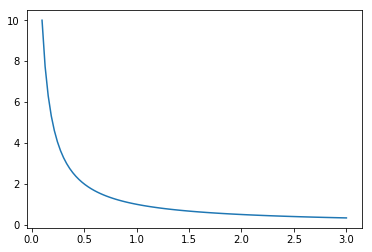

In [2]:
x = np.linspace(0.1,3,100)
y = 1.0 / x
plt.plot(x,y)

In [30]:
df = pd.read_csv("breast_cancer.csv")

In [31]:
df = df.iloc[:,:-1]
x = df.iloc[:,2:].values
y = df.iloc[:,1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [5]:
from sklearn.svm import SVC

In [18]:
#svm_model = SVC()
svm_model = SVC(kernel='linear',probability=True)
#svm_model = SVC(kernel='poly',degree=3)

In [19]:
svm_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svm_model.predict_proba(x_train)

array([[9.72585887e-01, 2.74141130e-02],
       [9.46897008e-01, 5.31029918e-02],
       [9.66747909e-01, 3.32520912e-02],
       [9.86640676e-01, 1.33593237e-02],
       [9.61278608e-01, 3.87213921e-02],
       [9.80623385e-01, 1.93766148e-02],
       [9.96037484e-01, 3.96251580e-03],
       [9.94131709e-01, 5.86829061e-03],
       [3.00000090e-14, 1.00000000e+00],
       [8.35666461e-01, 1.64333539e-01],
       [7.25336989e-01, 2.74663011e-01],
       [2.51900811e-01, 7.48099189e-01],
       [1.85409094e-10, 1.00000000e+00],
       [3.98104991e-10, 1.00000000e+00],
       [9.90119556e-01, 9.88044441e-03],
       [5.03060386e-02, 9.49693961e-01],
       [6.44652807e-01, 3.55347193e-01],
       [9.78909262e-01, 2.10907383e-02],
       [1.68341128e-01, 8.31658872e-01],
       [2.12427557e-01, 7.87572443e-01],
       [5.64472715e-03, 9.94355273e-01],
       [3.52207838e-06, 9.99996478e-01],
       [9.78330674e-01, 2.16693259e-02],
       [8.17550837e-01, 1.82449163e-01],
       [7.921970

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_train, svm_model.predict(x_train))

0.9714285714285714

In [9]:
confusion_matrix(y_train, svm_model.predict(x_train))

array([[281,   6],
       [  7, 161]], dtype=int64)

In [10]:
accuracy_score(y_test, svm_model.predict(x_test))

0.956140350877193

In [11]:
confusion_matrix(y_test, svm_model.predict(x_test))

array([[69,  1],
       [ 4, 40]], dtype=int64)

In [21]:
svm_model.predict(x_test)

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0], dtype=int32)

In [32]:
from sklearn.model_selection import GridSearchCV

In [34]:
svm_classifier = SVC()
param_grid = {
    "C":[0.001,0.01,0.1,1.0],
    "kernel":["linear","sigmoid"],
    "gamma":[0.001,0.01,0.1,1.0]
}
grid = GridSearchCV (estimator=svm_classifier, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print("\nBest Score: ",grid.best_score_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Best Score:  0.9692307692307692


In [36]:
accuracy_score(y_train, grid.predict(x_train))

0.9692307692307692

In [37]:
confusion_matrix(y_train, grid.predict(x_train))

array([[282,   5],
       [  9, 159]], dtype=int64)

In [38]:
accuracy_score(y_test, grid.predict(x_test))

0.9122807017543859

In [39]:
confusion_matrix(y_test, grid.predict(x_test))

array([[63,  7],
       [ 3, 41]], dtype=int64)